<a href="https://colab.research.google.com/github/TheNandinee/Parkinson-s-Disease-Detection-Model/blob/main/Parkinsion's_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Installing libraries***

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# ***Importing Libraries***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ***Uploading Dataset from Kaggle***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons_disease_data.csv to parkinsons_disease_data.csv


# ***Loading and previewing the dataset***

In [ ]:
# Loading  dataset
data = pd.read_csv('parkinsons_disease_data.csv')

# Displaying basic information about the dataset
print(data.info())

# Displaying the first few rows
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [ ]:
#already proven here , none of the columns are null , hence no need to check it seprately

# ***Visualising the data***

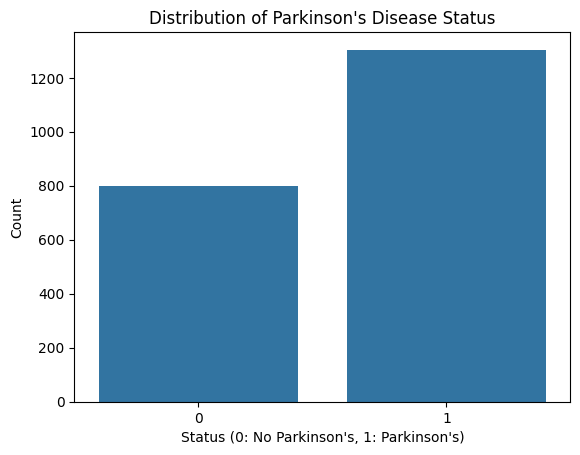

In [ ]:
# Visualising the distribution of the target variable
sns.countplot(x='Diagnosis', data=data)
plt.title('Distribution of Parkinson\'s Disease Status')
plt.xlabel('Status (0: No Parkinson\'s, 1: Parkinson\'s)')
plt.ylabel('Count')
plt.show()

# Preprocessing the data

In [ ]:
data.columns = data.columns.str.strip() #strings causing problems
#checking for non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['DoctorInCharge'], dtype='object')


In [ ]:
data = data.drop(['DoctorInCharge'], axis=1)  # Since it was creating issue while model training , i'm dropping the 'DoctorInCharge' column

# ***Splitting Data***

In [ ]:
X = data.drop(['Diagnosis'], axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***Model training***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initializing the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# ***Evaluating Model***

In [ ]:
y_pred = model.predict(X_test) #making predictions

print(confusion_matrix(y_test, y_pred)) #evaluation
print(classification_report(y_test, y_pred))

[[136  14]
 [ 23 248]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       150
           1       0.95      0.92      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421



In [ ]:
from sklearn.metrics import accuracy_score

#Calculating accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

Accuracy of the model: 0.91


# ***Visualizations***

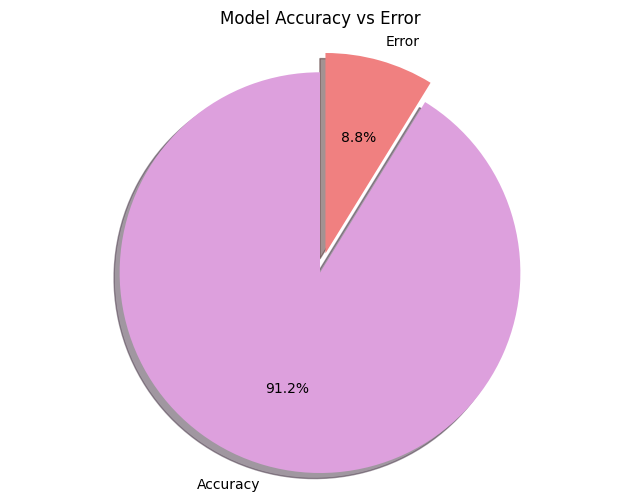

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for plotting
labels = ['Accuracy', 'Error']
error = 1 - accuracy
sizes = [accuracy * 100, error * 100]  # Convert to percentage
colors = ['plum', 'lightcoral']
explode = (0.1, 0)  # explode the accuracy slice for emphasis

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Model Accuracy vs Error')
plt.show()

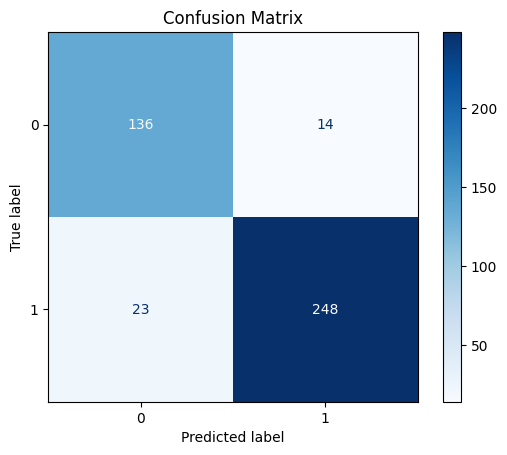

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay # Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

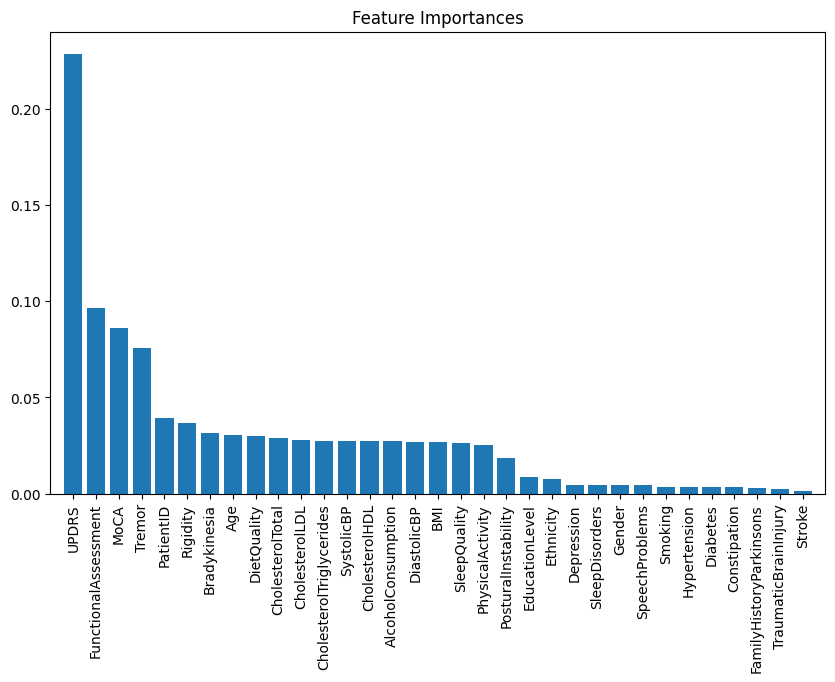

In [ ]:
import numpy as np

#Bar graph of Importance of features for detection

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()